In [156]:
# 1. Load the Data
# 2. Data Cleaning
# 3. Exploratory Data Analysis
# 4. Text Preprocessing
# 5. Model Building
# 6. Evaluation
# 7. Improvements
# 8. Website Building
# 9. Deployment

# 1. Loading the Data

In [157]:
import numpy as np
import pandas as pd

In [158]:
df = pd.read_csv(r'spam.csv', encoding='cp1252')

In [159]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1556,ham,Good sleep is about rhythm. The person has to ...,NaN,NaN,NaN
3110,ham,Short But Cute : \ Be a good person,"but dont try to prove\"" ..... Gud mrng...""",NaN,NaN
1475,ham,Nice. Wait...should you be texting right now? ...,NaN,NaN,NaN
1139,ham,Message:some text missing* Sender:Name Missing...,NaN,NaN,NaN
2972,ham,Happy New Year Princess!,NaN,NaN,NaN


In [160]:
df.shape

(5572, 5)

# 2. Data Cleaning

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [162]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [163]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [164]:
df.rename(columns={'v1':'classify', 'v2':'text'}, inplace=True)

In [165]:
df.head()

,classify,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.classify = encoder.fit_transform(df.classify)

In [167]:
df.head()

,classify,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
df.isnull().sum()

classify    0
text        0
dtype: int64

In [169]:
df.duplicated().sum()

403

In [170]:
df.drop_duplicates(keep='first', inplace=True)

In [171]:
df.duplicated().sum()

0

In [172]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis

In [173]:
df.classify.value_counts()

classify
0    4516
1     653
Name: count, dtype: int64

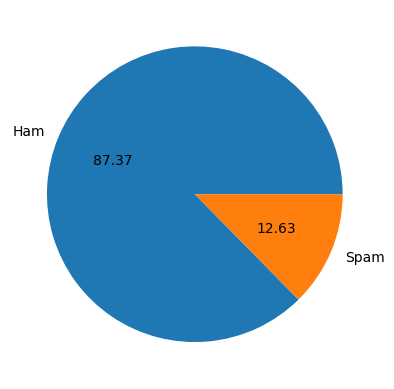

In [174]:
import matplotlib.pyplot as plt

plt.pie(df.classify.value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [192]:
#pip install --upgrade nltk

In [193]:
import nltk
#nltk.download('punkt')

In [194]:
df['num_characters'] = df.text.apply(len)

In [195]:
df['num_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [196]:
df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [197]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [198]:
df[df.classify == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [199]:
df[df.classify == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [200]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

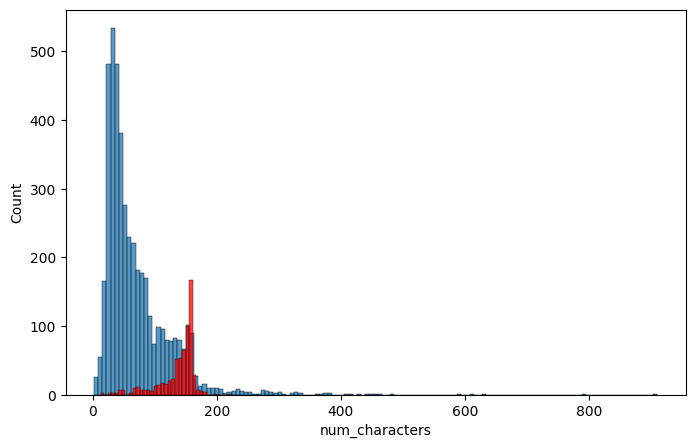

In [201]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['classify'] == 0]['num_characters'])
sns.histplot(df[df['classify'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

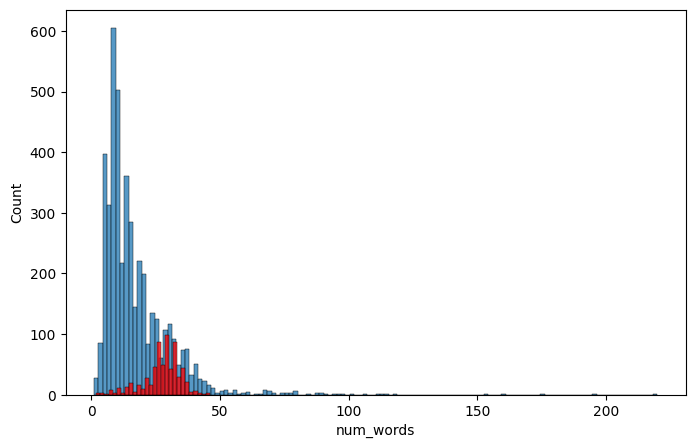

In [202]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['classify'] == 0]['num_words'])
sns.histplot(df[df['classify'] == 1]['num_words'],color='red')

C:\Program Files\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


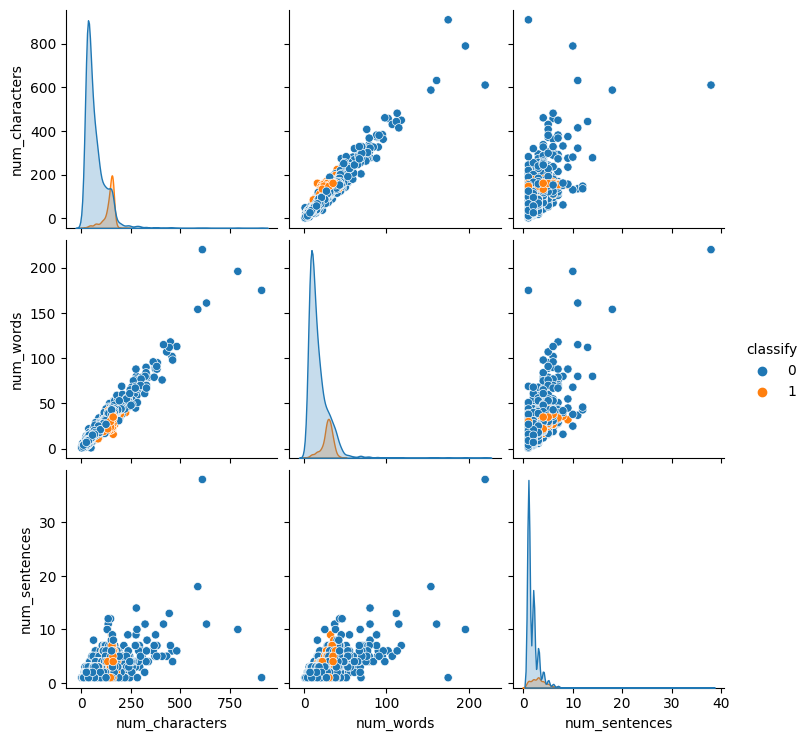

In [203]:
sns.pairplot(df,hue='classify')

<Axes: >

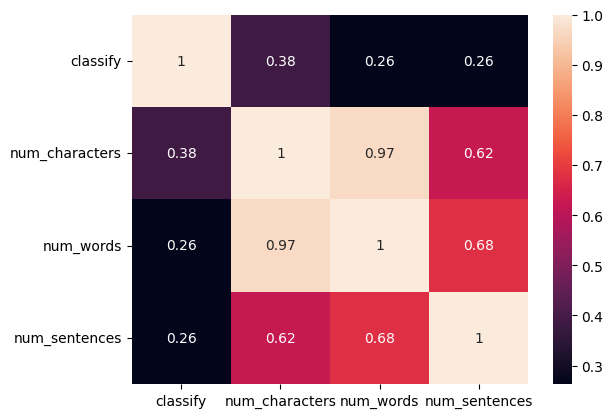

In [204]:
corr = df[['classify', 'num_characters', 'num_words', 'num_sentences']].corr()
sns.heatmap(corr,annot=True)

# 4. Text Preprocessing

In [205]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string 
#nltk.download('stopwords')

ps = PorterStemmer()

In [206]:
stopwords = stopwords.words('english')
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [207]:
def text_preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords and i not in punctuations:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
       
    return " ".join(y)

In [208]:
df['transformed_text'] = df.text.apply(text_preprocess)

In [209]:
df.head()

,classify,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [210]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=7, background_color='black')

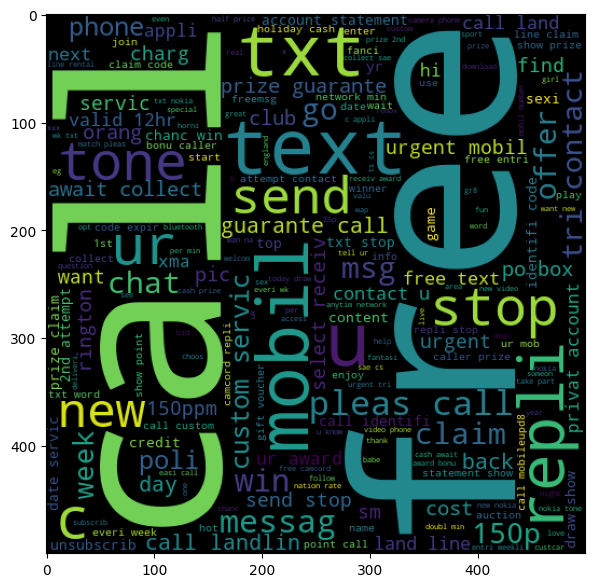

In [211]:
spam_wc = wc.generate(df[df.classify == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)

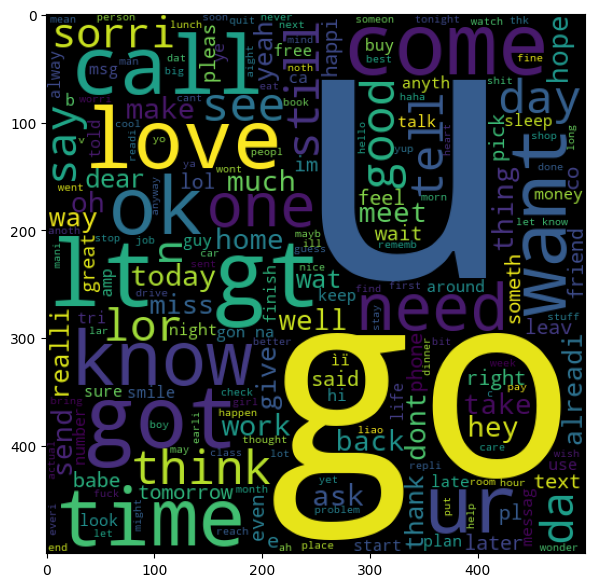

In [212]:
ham_wc = wc.generate(df[df.classify == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(7,7))
plt.imshow(ham_wc)

In [213]:
spam_corpus = []
for sms in df[df.classify == 1]['transformed_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)

In [214]:
from collections import Counter

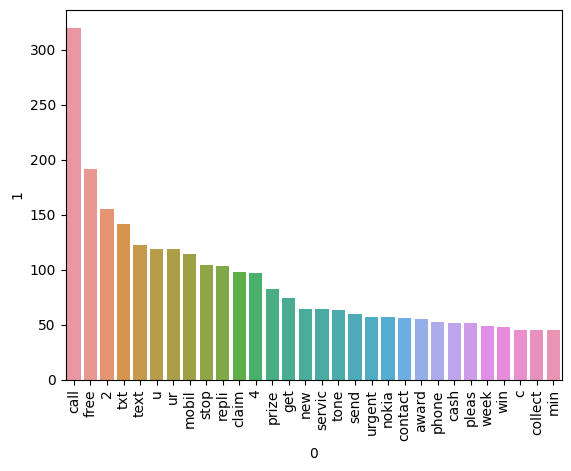

In [215]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [216]:
ham_corpus = []
for sms in df[df.classify == 0]['transformed_text'].tolist():
    for word in sms.split():
        ham_corpus.append(word)

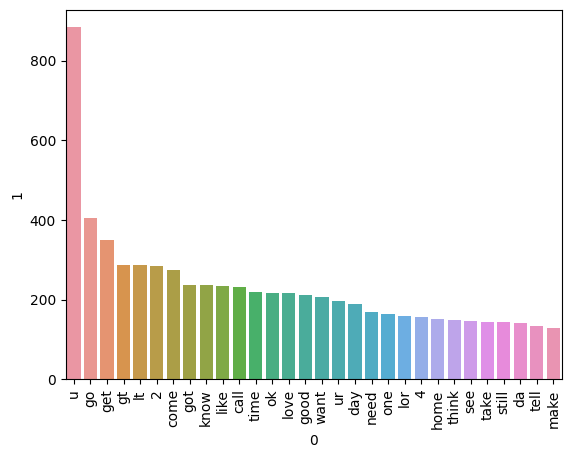

In [217]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Building

In [218]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [219]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
y =df['classify'].values

In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [221]:
x.shape

(5169, 3000)

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [224]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [225]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [226]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1))

Accuracy score:  0.8723404255319149
Confusion matrix: 
 [[782 114]
 [ 18 120]]
Precision score:  0.5128205128205128


In [227]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred2))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred2))
print('Precision score: ', precision_score(y_test, y_pred2))

Accuracy score:  0.9787234042553191
Confusion matrix: 
 [[889   7]
 [ 15 123]]
Precision score:  0.9461538461538461


In [228]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred3))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred3))
print('Precision score: ', precision_score(y_test, y_pred3))

Accuracy score:  0.9835589941972921
Confusion matrix: 
 [[895   1]
 [ 16 122]]
Precision score:  0.991869918699187


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [134]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [135]:
clfs = {
    'SVC': svc,
    'KN': knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [136]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [137]:
accuracy_scores = []
precision_scores = [] 

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train,x_test, y_test)
    
    print("Model: ", name)
    print("Accuracy score: ", current_accuracy)
    print("Precision score: ", current_precision, "\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Model:  SVC
Accuracy score:  0.9690522243713733
Precision score:  0.9274193548387096 

Model:  KN
Accuracy score:  0.9052224371373307
Precision score:  0.9761904761904762 

Model:  NB
Accuracy score:  0.9787234042553191
Precision score:  0.9461538461538461 

Model:  DT
Accuracy score:  0.9294003868471954
Precision score:  0.8282828282828283 

Model:  LR
Accuracy score:  0.9671179883945842
Precision score:  0.9642857142857143 

Model:  RF
Accuracy score:  0.9758220502901354
Precision score:  0.9829059829059829 

Model:  AdaBoost
Accuracy score:  0.960348162475822
Precision score:  0.9292035398230089 

Model:  BgC
Accuracy score:  0.9584139264990329
Precision score:  0.8682170542635659 

Model:  ETC
Accuracy score:  0.9748549323017408
Precision score:  0.9745762711864406 

Model:  GBDT
Accuracy score:  0.9468085106382979
Precision score:  0.9191919191919192 

Model:  xgb
Accuracy score:  0.9671179883945842
Precision score:  0.9262295081967213 



# 6. Evaluation

In [138]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [139]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


# 7. Improvements

In [147]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [148]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [150]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Precision score: ",precision_score(y_test,y_pred))

Accuracy score:  0.9796905222437138
Precision score:  0.968


In [151]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [152]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [154]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Precision score: ",precision_score(y_test,y_pred))

Accuracy score:  0.9816247582205029
Precision score:  0.9541984732824428


In [155]:
import pickle

In [230]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))